In [28]:
import pandas as pd 
from IPython.display import display, HTML
input_path= r"C:\Users\DELL\OneDrive\Desktop\Project\shopping_behavior_updated.xlsx"
df=pd.read_excel(input_path)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [17]:
gender_counts=df['Gender'].value_counts()
print(gender_counts)

Gender
Male      2652
Female    1248
Name: count, dtype: int64


In [18]:
average_age=df['Age'].mean()
print(average_age)

44.06846153846154


In [20]:
df.groupby('Location')['Purchase Amount (USD)'].sum()

Location
Alabama           5261
Alaska            4867
Arizona           4326
Arkansas          4828
California        5605
Colorado          4222
Connecticut       4226
Delaware          4758
Florida           3798
Georgia           4645
Hawaii            3752
Idaho             5587
Illinois          5617
Indiana           4655
Iowa              4201
Kansas            3437
Kentucky          4402
Louisiana         4848
Maine             4388
Maryland          4795
Massachusetts     4384
Michigan          4533
Minnesota         4977
Mississippi       4883
Missouri          4691
Montana           5784
Nebraska          5172
Nevada            5514
New Hampshire     4219
New Jersey        3802
New Mexico        5014
New York          5257
North Carolina    4742
North Dakota      5220
Ohio              4649
Oklahoma          4376
Oregon            4243
Pennsylvania      4926
Rhode Island      3871
South Carolina    4439
South Dakota      4236
Tennessee         4772
Texas             4712
Ut

In [34]:
df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [26]:
category_sales=df.groupby('Category')['Purchase Amount (USD)'].sum()
print(category_sales)

Category
Accessories     74200
Clothing       104264
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


In [32]:
##Average transaction amount by payment method.
avg_transaction=df.groupby('Payment Method')['Purchase Amount (USD)'].mean()
print(avg_transaction)


Payment Method
Bank Transfer    59.712418
Cash             59.704478
Credit Card      60.074516
Debit Card       60.915094
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64


In [31]:
## Average purchase amount per season

avg_purchase=df.groupby('Season')['Purchase Amount (USD)'].mean()
print(avg_purchase)

Season
Fall      61.556923
Spring    58.737738
Summer    58.405236
Winter    60.357364
Name: Purchase Amount (USD), dtype: float64


In [40]:
total_rev=df.groupby('Discount Applied')['Purchase Amount (USD)'].sum()
print(total_rev)

Discount Applied
No     133670
Yes     99411
Name: Purchase Amount (USD), dtype: int64


In [43]:
#Average spend for customers using promo codes vs not.

avg_spend=df.groupby('Promo Code Used')['Purchase Amount (USD)'].mean()
print(avg_spend)

Promo Code Used
No     60.130454
Yes    59.279070
Name: Purchase Amount (USD), dtype: float64


In [65]:
# Top 10 “active” customers based on spend
top_spenders = df[['Customer ID', 'Purchase Amount (USD)']].sort_values(by='Purchase Amount (USD)',ascending=False).head(10)
top_spenders

,Customer ID,Purchase Amount (USD)
1479,1480,100
1456,1457,100
1591,1592,100
2071,2072,100
1421,1422,100
1412,1413,100
1405,1406,100
1847,1848,100
769,770,100
2842,2843,100


In [68]:
##Average purchases for subscribers vs non-subscribers.

avg_subs=df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()
avg_subs

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

In [70]:
"""
Total spend by:
Gender
Location
Product category
Season
"""

total_spend=df.groupby(['Gender','Location','Category','Season'])['Purchase Amount (USD)'].sum()
total_spend

Gender  Location  Category     Season
Female  Alabama   Accessories  Fall      128
                               Spring    104
                               Summer     87
                               Winter    150
                  Clothing     Fall      129
                                        ... 
Male    Wyoming   Footwear     Spring     68
                               Summer     20
                               Winter    406
                  Outerwear    Fall       76
                               Winter    152
Name: Purchase Amount (USD), Length: 1261, dtype: int64

In [8]:
##•	What are the top 5 products by revenue?

prod_revenue=df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False)
prod_revenue.head(5)





Item Purchased
Blouse     10410
Shirt      10332
Dress      10320
Pants      10090
Jewelry    10010
Name: Purchase Amount (USD), dtype: int64

In [71]:
pay_counts = df['Payment Method'].value_counts(normalize=True) * 100
pay_counts = pay_counts.round(2)
per_str = pay_counts.astype(str) + '%'

print(per_str)


Payment Method
PayPal           17.36%
Credit Card      17.21%
Cash             17.18%
Debit Card       16.31%
Venmo            16.26%
Bank Transfer    15.69%
Name: proportion, dtype: object


In [18]:
##	Does age correlate with amount spent?

correlation = df['Age'].corr(df['Purchase Amount (USD)'])
print("Correlation between Age and Amount Spent:", correlation)


Correlation between Age and Amount Spent: -0.010423647378686531


In [25]:
##Does gender correlate with average transaction amount?
df['Gender_num'] = df['Gender'].map({'Male': 0, 'Female': 1})
corr_gen=df['Gender_num'].corr(df['Purchase Amount (USD)']).mean()
print("Correlation between Gender and Amount Spent:",corr_gen)

Correlation between Gender and Amount Spent: 0.014044097963277644


In [33]:
##Is there a relationship between age and use of promo codes?
df['prom_nums']=df['Promo Code Used'].map({"Yes":0, "No":1})
corr_prom=df['prom_nums'].corr(df['Age'])
print("Correlation between Age and Amount Spent:",corr_prom)


Correlation between Age and Amount Spent: -0.004366296264629715


In [36]:
##Is there a relationship between age and use of promo codes?
df['prom_nums']=df['Promo Code Used'].map({"Yes":0, "No":1})
corr_prom=df['prom_nums'].cov(df['Age'])
print("Covariance between Age and Amount Spent:",corr_prom)


Covariance between Age and Amount Spent: -0.032877660938702126


In [46]:
df.head(4)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,46-55
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,18-25
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,46-55
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,18-25


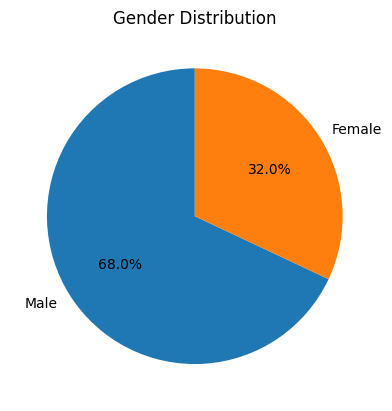

In [38]:
##Gender distribution
gender_counts = df['Gender'].value_counts()  # counts of each gender



plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.show()


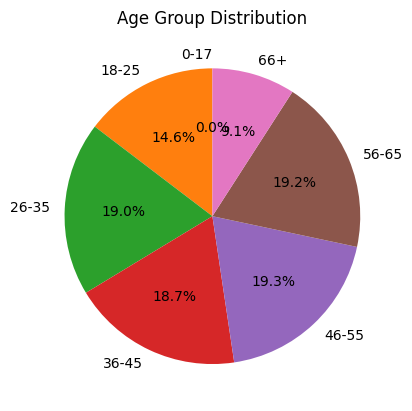

In [44]:
## Age Group Distribution 
import pandas as pd
import matplotlib.pyplot as plt


bins = [0, 17, 25, 35, 45, 55, 65, 100]
labels = ["0-17", "18-25", "26-35", "36-45", "46-55", "56-65", "66+"]


df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)

age_group_count = df['Age Group'].value_counts().sort_index()

plt.pie(age_group_count.values, labels=age_group_count.index, autopct='%1.1f%%', startangle=90)
plt.title("Age Group Distribution")
plt.show()


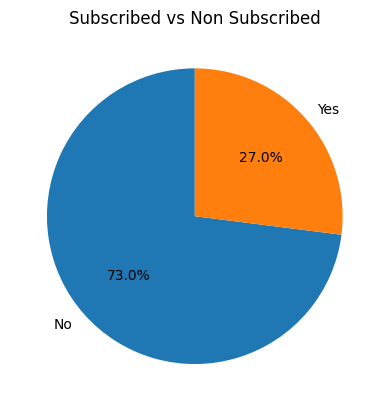

In [59]:
##Subscribed vs Non Subscribed 

sub_counts= df['Subscription Status'].value_counts()

plt.pie(sub_count.values,labels=sub_count.index,autopct='%1.1f%%',startangle=90)
plt.title("Subscribed vs Non Subscribed")
plt.show()